# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Filip Wójcik 252980

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 4

1. Wczytanie sygnałów i ich interpretacja, odczytanie częstotliwości sygnałów sinusoidalnych.
2. Transformata Fouriera jako narzędzie do analizy częstotliwościowej.
3. Decymacja i aliasing - czym jest i jak ją interpretować.
4. Przeciek widma - kiedy występuje?
5. Spektrogram jako narzędzie do analizy czasowo-częstotliwościowej.

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [1]:
% pkg install -forge signal
pkg load signal

### Zadanie 1

Na pierwszych i drugich zajęciach nauczyliśmy się ustalać częstotliwość sygnału sinusoidalnego na podstawie przebiegu czasowego. Spróbujmy zrobić to ponownie - w plikach sig_1.mat oraz sig_2.mat znajdują się zapisane sygnały. Wyrysuj ich przebieg w czasie i postaraj się odczytać częstotliwość sygnałów sinusoidalnych. Częstotliwość próbkowania wynosi $f_s=2 [kHz]$.
Czy udało Ci się w obu przypadkach rozszyfrować z jakich sygnałów sinusoidalnych składa się sygnał? Odpowiedź zapisz w komórce poniżej kodu.



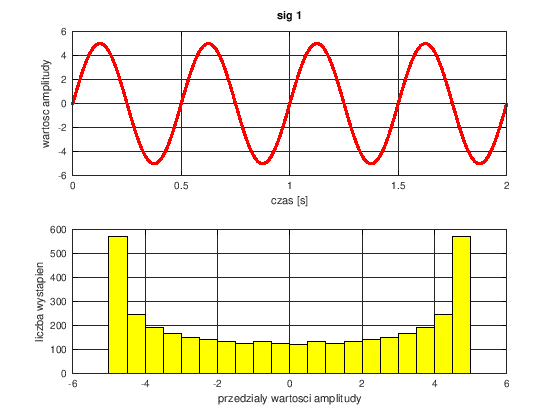

In [2]:
% tutaj jest mijesce na napisanie kodu
load('sig_1.mat');
fs=2*10^3;
p=length(sig_1);
delta_t=1/fs;
t1=0:delta_t:(p-1)*delta_t;

subplot(2,1,1);
plot(t1,sig_1, '.r');
title("sig 1");
xlabel("czas [s]");
ylabel("wartosc amplitudy");
grid on;

subplot(2,1,2)
hist(sig_1,20, '.y')
xlabel('przedzialy wartosci amplitudy')
ylabel('liczba wystapien')
title('')
grid on

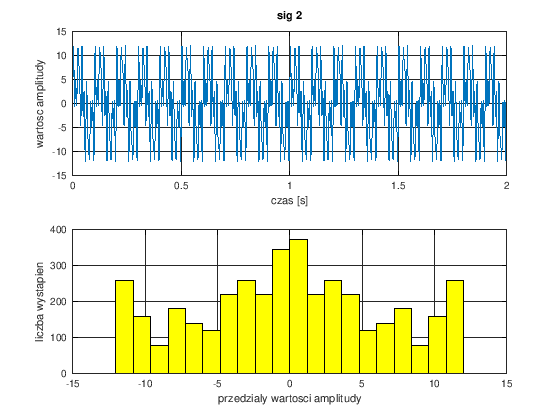

In [3]:
% tutaj jest mijesce na napisanie kodu
load('sig_2.mat');
fs=2*10^3;
p2=length(sig_2);
delta_t=1/fs;
t2=0:delta_t:(p2-1)*delta_t;

subplot(2,1,1);
plot(t2,sig_2);
title("sig 2");
xlabel("czas [s]");
ylabel("wartosc amplitudy");
grid on;

subplot(2,1,2)
hist(sig_2,20, '.y')
xlabel('przedzialy wartosci amplitudy')
ylabel('liczba wystapien')
title('')
grid on



**ODPOWIEDŹ:**

Z wykresu sig 1 jesteśmy stwierdzić jaki to sygnał sinusoidalny, z wykresu sig 2 jest to bardzo ciężkie i nie jest to tak oczywiste jak w przypadku sig 1!




## Transformata Fouriera

Cyfrowe sygnały mogą być analizowane w dziedzinie czasu oraz w dziedzinie częstotliwości. Algorytmy działające w dziedzinie czasu operują bezpośrednio na próbkach cyfrowego sygnału. Analiza częstotliwościowa sygnału, stosowana w wielu operacjach cyfrowego przetwarzania sygnałów, polega na przekształceniu sygnału z dziedziny czasu do dziedziny częstotliwości. Widmo sygnału (ang. spectrum) to reprezentacja częstotliwościowa sygnału, często mówi się więc o analizie widmowej.

Jean-Baptiste Joseph Fourier odkrył, że dowolny sygnał okresowy można przedstawić w postaci szeregu Fouriera, czyli sumy sygnałów trygonometrycznych (kosinusów i sinusów) o różnych amplitudach i częstotliwościach. Operację przekształcenia sygnału z dziedziny czasu do dziedziny częstotliwości nazywa się przekształceniem (transformacją) Fouriera (Fourier transform). Wynik tej operacji, czyli częstotliwościową reprezentację sygnału, nazywa się transformatą Fouriera. W przypadku sygnałów dyskretnych (cyfrowych) mówimy o dyskretnym przekształceniu Fouriera (DFT - Discrete Fourier Transform). W praktyce zwykle nie oblicza się transformaty z definicji, stosuje się np. algorytm szybkiego przekształcenia Fouriera (FFT - Fast Fourier Transform).

Na podstawie N próbek sygnału otrzymujemy N wartości widmowych, pokrywających zakres od 0 do  fs , gdzie  fs  jest częstotliwością próbkowania, a  fs/2  jest częstotliwością Nyquista.


W naszym przypadku korzystać będziemy z funkcji **fft( )** do obliczenia transformaty oraz funkcji **stem( )** do jej wyrysowania.

### Zadanie 2

Oblicz transformatę Fouriera dla wczytanych wcześniej sygnałów oraz wyrysuj jej widmo amplitudowe.

Chcemy uzyskać dwa podwójne wykresy - na każdym z nich będziemy mieć sygnał w czasie, a pod nim wyrysowane widmo. Czy jesteśmy w stanie odczytać z jakich składowych sinusoidalnych składa się nasz sygnał?





In [4]:
% help fft
% help abs
% helpo stem

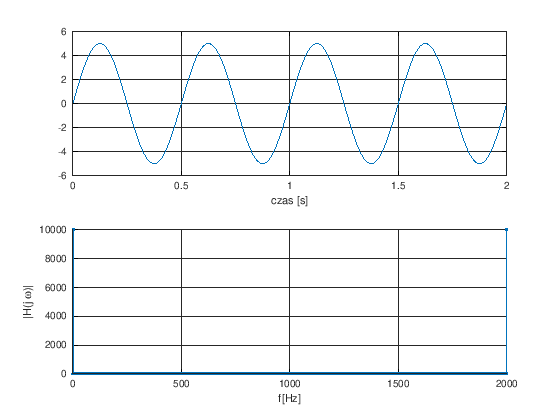

In [5]:
load("sig_1.mat")
fs=2000;
delta_t = 1/fs;
t=0:delta_t:(length(sig_1)-1)*delta_t;

tf_sig = fft(sig_1);
abs_tf_sig = abs(tf_sig);

N_tf = length(tf_sig);
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;

figure
subplot(2,1,1)
plot(t, sig_1)
grid on
xlabel('czas [s]')

subplot(2,1,2)
stem(f, abs_tf_sig, 'p.')
xlabel('f[Hz]')
ylabel('|H(j \omega)|')
grid on

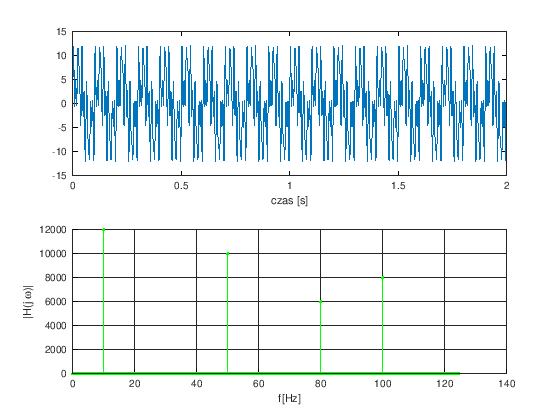

In [6]:
% tutaj jest miejsce na napisanie kodu
% sig_1 sig_2
load("sig_2.mat")
fs=2000;
delta_t = 1/fs;
t=0:delta_t:(length(sig_2)-1)*delta_t;

tf_sig = fft(sig_2);
abs_tf_sig = abs(tf_sig);

N_tf = length(tf_sig); % długość transformaty
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;

figure
subplot(2,1,1)
plot(t, sig_2)
xlabel('czas [s]')

subplot(2,1,2)
stem(f, abs_tf_sig, 'r.')
stem(f(1:250), abs_tf_sig(1:250), 'g.')
xlabel('f[Hz]')
ylabel('|H(j \omega)|')

grid on


### Zadanie 3

Analiza częstotliwościowa szumu - sprawdźmy z jakich składowych sinusoidalnych składają się poszczególne szumy. W tym celu:
1. Za pomocą funkcji **`load`** wczytujemy dwa pliki z szumem do naszego programu. Nazwy zmiennych są tożsame z nazwami pliku (czyli po wykonaniu load mamy w programie dostępne zmienne `szum_1` oraz `szum_2`).
2. Generujemy wektor czasu dla naszego sygnału. Częstotliwość próbkowania wynosi $f_s=500[Hz]$, natomiast długość sygnału w próbkach (czyli długość wektora) można sprawdzić za pomocą funkcji **`length()`**. Dla ułatwienia szumy zostały zapisane z taką samą częstotliwością próbkowania i mają tyle samo próbek, więc wystarczy nam jeden wektor czasu.
2. Rysujemy pierwszy potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_1 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał 20 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
3. Rysujemy drugi potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_2 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał tym razem 10 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
4. Uruchamiamy komórkę i poprawiamy tytuły wykresów  (`title()`) na takie, które będą związane z rodzajem wyrysowanego szumu.


In [7]:
% dokumentacja do wykorzystywanych funkcji. Aby ją zobaczyć należy odkomentować linijkę która aktualnie Was interesuje
% help load
% help hist
% help fft
% help stem

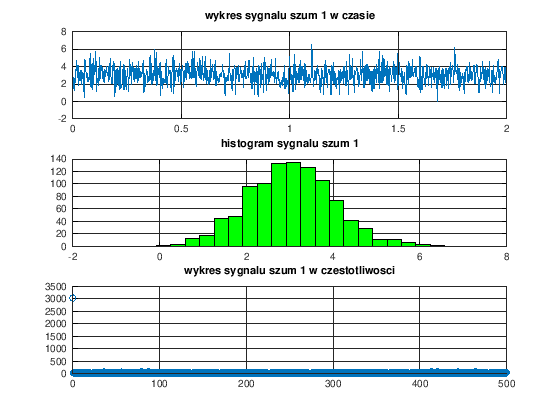

In [8]:
%pierwsze okienko
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_1

load("szum_1.mat");
fs = 500;
delta_t = 1/fs;
len=length(szum_1);
t = 0:delta_t:(len-1)*delta_t;
fstep = fs/len;
f = 0:fstep:fs-fstep;

fftsig = fft(szum_1);

fftsig = abs(fftsig);

figure
% rysunki dla szum_1
subplot(3,1,1);
plot(t,szum_1);
title("wykres sygnalu szum 1 w czasie");
grid on

subplot(3,1,2);
hist(szum_1,20, '.g');
title("histogram sygnalu szum 1");
grid on


subplot(3,1,3);
stem(f,fftsig);
title("wykres sygnalu szum 1 w czestotliwosci");
grid on



In [9]:
%drugie okienko
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_2

load("szum_2.mat");

fftsig2 = fft(szum_2);

fftsig2 = abs(fftsig2);


figure
% rysunki dla szum_2
subplot(3,1,1);
plot(t,szum_2);
title("wykres sygnalu szum 2 w czasie");
grid on

subplot(3,1,2);
hist(szum_2,10, '.g');
title("histogram sygnalu szum 2");
grid on

subplot(3,1,3);
stem(f,fftsig2);
title("wykres sygnalu szum 2 w czestotliwosci");
grid on



### Zadanie 5

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy poprzednim temacie. Pamiętaj o opisaniu wykresu! Skorzystaj z pierwszego pola w funkcji _subplot()_ - będziemy chcieli mieć dwa wykresy pod sobą (dwa wiersze, jedna kolumna).

Na drugim wykresie wyrysuj widmo amplitudowe tego sygnału. Co na jego podstawie możesz powiedzieć? Co jesteś w stanie powiedzieć na temat częstotliwości maksymalnej sygnału w stosunku do częstotliwości próbkowania?



In [10]:
% tuaj jest miejsce na kod
[y,Fs]=audioread('czepek.wav');
time = (0:size(y,1)-1)/Fs;

fstep = Fs/length(y);
f = 0:fstep:Fs-fstep;

Fs=Fs % czestotliwosc probkowania sygnalu czepek.wav
fftsig = fft(y);

fftsig = abs(fftsig);


figure
subplot(2,1,1);
plot(time,y);
title("wykres sygnalu czepek.wav w czasie");
ylabel("Amplituda");
xlabel("Czas[s]");
grid on

subplot(2,1,2);
stem(f,fftsig);
title("wykres sygnalu czepek.wav w czestotliwosci");
ylabel('|H(j \omega)|');
xlabel("f[HZ]");
grid on



Fs =  48000


**ODPOWIEDŹ**: 
Maksymalna częstotliwość sygnału jest taka sama jak częstotliwość próbkowania

## Decymacja

Czym jest decymacja? Na podstawie tego co usłyszałeś zapisz definicję zrozumiałą dla Ciebie :)

**Decymacja** - przekształcenie sygnału dyskretnego, polegające na zachowaniu co M-tej próbki, a odrzuceniu pozostałych.


### Zadanie 6

Przeanalizuj wczytane dzisiaj sygnały (sig_1, sig_2 oraz czepek) - czy możemy wykonać ich decymację? Jeśli tak to jakiego rzędu? Przeprowadź decymację sygnałów w których jest to możliwe. Za każdym razem wyrysuj przebieg czasowy i widmo amplitudowe przed decymacją oraz po niej. Czy coś się zmieniło na widmie? Przeanalizuj i opisz co dokładnie widzisz. Opisz wnioski ze swojego eksperymentu w polu odpowiedź.

Do wykonania decymacji użyj funkcji **decimate()**.

In [11]:
help decimate

'decimate' is a function from the file /usr/local/share/octave/packages/signal-1.4.1/decimate.m

 -- Function File: Y = decimate (X, Q)
 -- Function File: Y = decimate (X, Q, N)
 -- Function File: Y = decimate (..., "fir")

     Downsample the signal X by a reduction factor of Q.  A lowpass
     antialiasing filter is applied to the signal prior to reducing the
     input sequence.  By default, an order N Chebyshev type I filter is
     used.  If N is not specified, the default is 8.

     If the optional argument '"fir"' is given, an order N FIR filter is
     used, with a default order of 30 if N is not given.

     Note that Q must be an integer for this rate change method.

     Example:
          ## Generate a signal that starts away from zero, is slowly varying
          ## at the start and quickly varying at the end, decimate and plot.
          ## Since it starts away from zero, you will see the boundary
          ## effects of the antialiasing filter clearly.  Next you will se

**Odpowiedź:**




___